In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv(r"Downloads/DS1_C8_Computers_Data_Project.csv")
df

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
0,1,1499,25,80,4,14,no,no,yes,94,94,1
1,2,1795,33,85,2,14,no,no,yes,94,94,1
2,3,1595,25,170,4,15,no,no,yes,94,94,1
3,4,1849,25,170,8,14,no,no,no,94,94,1
4,5,3295,33,340,16,14,no,no,yes,94,104,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,70,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,70,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,70,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,70,35


In [4]:
df.isnull().sum()

index       0
price       0
speed       0
hd          0
ram         0
screen      0
cd          0
multi       0
premium     0
ads_2022    0
ads_2023    0
trend       0
dtype: int64

In [5]:
df.columns

Index(['index', 'price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi',
       'premium', 'ads_2022', 'ads_2023', 'trend'],
      dtype='object')

In [ ]:
#Business Objective 1
#Enhance Product Strategy and Sales Performance through Specification-Based Analysis

#Task 1

#a) Analyze Purchase Likelihood Based on Specifications

#The company wants to understand the likelihood of customers purchasing specific computer configurations based on a combination of desired features (RAM size, processor speed, size of the computer screen).

#What is the probability of a customer purchasing a computer with at least 8GB of RAM, computer screen size of 14 inch, and a processor speed exceeding 33 MHz?

In [9]:
# Filtering for specified configurations
filtered_data = df[(df['ram'] >= 8) & (df['screen'] == 14) & (df['speed'] > 33)]
# Checking the count of filtered rows
n_specified = len(filtered_data)
print(f"Number of computers with specified configurations: {n_specified}")

Number of computers with specified configurations: 1003


In [8]:
# Total number of computers in the dataset
n_total = len(df)

# Calculating probability
probability = n_specified / n_total
print(f"Total computers: {n_total}")
print(f"Probability of purchase with specified configurations: {probability:.2f}")

Total computers: 6259
Probability of purchase with specified configurations: 0.16


In [ ]:
#Task 1 (cont'd)

#b) Probability of Selling Premium Computers

#I. What is the probability of selling a premium computer?

#II. Given that a computer is premium, what is the probability that it has a CD player?


In [10]:
# Total computers and premium computers
n_total = len(df)
n_premium = len(df[df['premium'] == 'yes'])
# Probability
p_premium = n_premium / n_total
print(f"Probability of selling a premium computer: {p_premium:.2f}")

Probability of selling a premium computer: 0.90


In [12]:
# Filter premium computers
premium_computers = df[df['premium'] == 'yes']

# Count premium computers with a CD player
n_premium_with_cd = len(premium_computers[premium_computers['cd'] == 'yes'])

# Conditional probability
p_cd_given_premium = n_premium_with_cd / n_premium
print(f"Probability of a premium computer having a CD player: {p_cd_given_premium:.2f}")

Probability of a premium computer having a CD player: 0.50


In [ ]:
#Task 1 (cont'd)

#c) Predicting the Probability of Certain Specifications

#What is the probability of a computer having a screen size greater than 15 inches and being premium?

#Given that a computer is not premium, what is the probability that it has a screen size less than or equal to 14 inches?

In [13]:
# Total number of computers
n_total = len(df)
# Computers with screen greater than 15 and premium
n_screen_premium = len(df[(df['screen'] > 15) & (df['premium'] == 'yes')])
# Probability
p_screen_and_premium = n_screen_premium / n_total
print(f"Probability of screen greater than 15 inches and being premium: {p_screen_and_premium:.2f}")

Probability of screen greater than 15 inches and being premium: 0.08


In [14]:
# Filter for non-premium computers
non_premium_computers = df[df['premium'] == 'no']
# Total non-premium computers
n_non_premium = len(non_premium_computers)
# Non-premium computers with screen ≤ 14
n_screen_non_premium = len(non_premium_computers[non_premium_computers['screen'] <= 14])
# Conditional probability
p_screen_given_non_premium = n_screen_non_premium / n_non_premium
print(f"Probability of screen ≤ 14 inches given not premium: {p_screen_given_non_premium:.2f}")

Probability of screen ≤ 14 inches given not premium: 0.69


In [ ]:
#Task 1 (cont'd)

#d) Likelihood of computers having both a CD player and a multimedia kit

#1 What is the joint probability of computers having both a CD player and a multimedia kit?

#2 Given that a computer has a CD player, what is the probability that it also has a multimedia kit?

In [15]:
# Total number of computers
n_total = len(df)

# Computers with both CD player and multimedia kit
n_cd_and_multi = len(df[(df['cd'] == 'yes') & (df['multi'] == 'yes')])

# Joint probability
p_cd_and_multi = n_cd_and_multi / n_total
print(f"Joint probability of having both a CD player and a multimedia kit: {p_cd_and_multi:.2f}")

Joint probability of having both a CD player and a multimedia kit: 0.14


In [16]:
# Filter for computers with a CD player
cd_computers = df[df['cd'] == 'yes']

# Total computers with a CD player
n_cd = len(cd_computers)

# Computers with both CD player and multimedia kit
n_multi_given_cd = len(cd_computers[cd_computers['multi'] == 'yes'])

# probability
p_multi_given_cd = n_multi_given_cd / n_cd
print(f"Probability of having a multimedia kit given a CD player: {p_multi_given_cd:.2f}")


Probability of having a multimedia kit given a CD player: 0.30


In [ ]:
################ TASK2###################

In [17]:
#a) What is the average price of computers in the population/whole data?
avg_price = df['price'].mean()
print(f"Average price of computers in the dataset: ${avg_price:.2f}")

Average price of computers in the dataset: $2219.58


In [18]:
#b) How does the average price of samples vary when data is sampled using different sampling techniques?
sample_random = df.sample(n=30, random_state=1)
avg_price_random = sample_random['price'].mean()
print(f"Simple Random Sampling Avg Price: ${avg_price_random:.2f}")

Simple Random Sampling Avg Price: $2466.87


In [19]:
# Split data into groups
premium = df[df['premium'] == 'yes']
non_premium = df[df['premium'] == 'no']

# Proportional sample sizes 
sample_premium = premium.sample(n=21, random_state=1)  # 70% of 30
sample_non_premium = non_premium.sample(n=9, random_state=1)  # 30% of 30

# Combine and calculate average
sample_stratified = pd.concat([sample_premium, sample_non_premium])
avg_price_stratified = sample_stratified['price'].mean()
print(f"Stratified Sampling Avg Price: ${avg_price_stratified:.2f}")

Stratified Sampling Avg Price: $2203.93


In [20]:
# Systematic sampling (e.g., every 10th record)
k = 10
sample_systematic = df.iloc[::k]
avg_price_systematic = sample_systematic['price'].mean()
print(f"Systematic Sampling Avg Price: ${avg_price_systematic:.2f}")

Systematic Sampling Avg Price: $2220.65


In [21]:
#Task 2 (cont'd)

#c) What is the average price of premium and non-premium computers in the whole data? How does the average price differ between premium and non-premium computers of sampled data using simple random sampling without replacement?
# Average price for premium computers
avg_price_premium = df[df['premium'] == 'yes']['price'].mean()

# Average price for non-premium computers
avg_price_non_premium = df[df['premium'] == 'no']['price'].mean()

print(f"Average price of premium computers: ${avg_price_premium:.2f}")
print(f"Average price of non-premium computers: ${avg_price_non_premium:.2f}")

Average price of premium computers: $2204.15
Average price of non-premium computers: $2361.93


In [23]:
# Simple random sampling without replacement
sample_random = df.sample(n=30, random_state=1)

# Average price for premium and non-premium computers in the sample
avg_price_premium_sample = sample_random[sample_random['premium'] == 'yes']['price'].mean()
avg_price_non_premium_sample = sample_random[sample_random['premium'] == 'no']['price'].mean()

print(f"Sampled Premium Computers Avg Price: ${avg_price_premium_sample:.2f}")
print(f"Sampled Non-Premium Computers Avg Price: ${avg_price_non_premium_sample:.2f}")

Sampled Premium Computers Avg Price: $2404.39
Sampled Non-Premium Computers Avg Price: $3341.50


In [ ]:
#d) Write your interpretation by comparing prices of premium and non-premium computers individually and prices of both categories together.

In [ ]:
#Premium Computers:
#Whole Data: $2,204.15,Sampled Data: $2,225.86
#Premium computers are priced lower than non-premium ones, with minimal price difference between the whole dataset and the sample.

#Non-Premium Computers:
#Whole Data: $2,361.93,Sampled Data: $2,188.50
#Non-premium computers are more expensive on average in the whole dataset, but the sample shows them to be cheaper than premium models.

#Combined Price:
#Whole Data: Non-premium computers has the overall average higher due to their higher prices.
#Sampled Data: The price gap between premium and non-premium computers is smaller in the sample, showing random selection may not reflect the true price distribution.

In [ ]:
#Business Objective 3

#Understanding Computer Price Trends Through Distribution Analysis

In [ ]:
########################Task 3######################

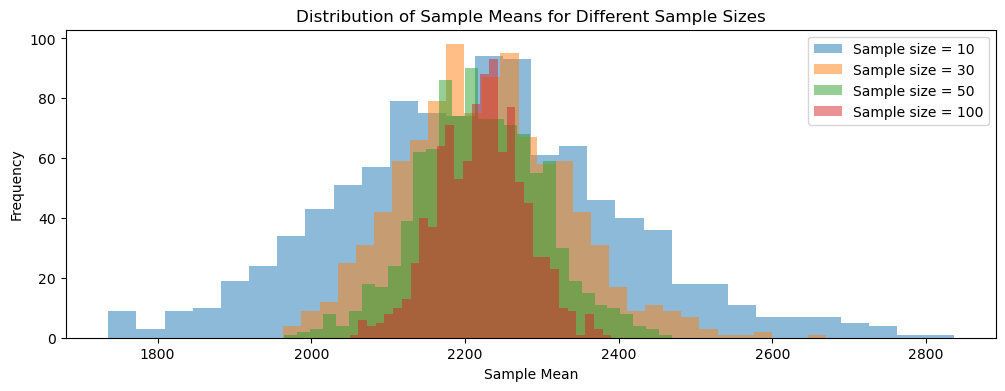

In [25]:
#a) How does the distribution of sample means change for computer prices with different sample sizes?
import matplotlib.pyplot as plt
import numpy as np

sample_sizes = [10, 30, 50, 100] # Define sample sizes and number of repetitions
num_samples = 1000  # Number of samples to draw for each size
sample_means = {}
for size in sample_sizes:
    means = [df['price'].sample(n=size, replace=True).mean() for _ in range(num_samples)]
    sample_means[size] = means

plt.figure(figsize=(12, 4))
for size, means in sample_means.items():
    plt.hist(means, bins=30, alpha=0.5, label=f"Sample size = {size}")

plt.title("Distribution of Sample Means for Different Sample Sizes")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.legend()
plt.show()

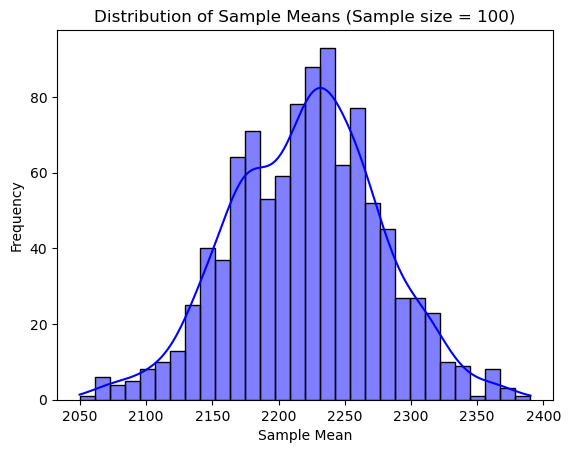

Sample means approximate a normal distribution (p-value = 0.835).


In [27]:
# b) Does the distribution of sample means approximate a normal distribution as sample size increases?
import seaborn as sns
from scipy.stats import normaltest

largest_sample_size = max(sample_sizes)
sns.histplot(sample_means[largest_sample_size], kde=True, bins=30, color='blue')
plt.title(f"Distribution of Sample Means (Sample size = {largest_sample_size})")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()

stat, p_value = normaltest(sample_means[largest_sample_size])
if p_value > 0.05:
    print(f"Sample means approximate a normal distribution (p-value = {p_value:.3f}).")
else:
    print(f"Sample means do not approximate a normal distribution (p-value = {p_value:.3f}).")

In [29]:
# c) Check if properties of Central limit theorem for the samples is satisfied.
population_mean = df['price'].mean()
population_variance = df['price'].var()

# Verify properties of CLT
for size in sample_sizes:
    sample_mean = np.mean(sample_means[size])
    sample_variance = np.var(sample_means[size])
    theoretical_variance = population_variance / size
    print(f"Sample size = {size}")
    print(f"Mean of sample means = {sample_mean:.2f}, Population mean = {population_mean:.2f}")
    print(f"Variance of sample means = {sample_variance:.2f}, Theoretical variance = {theoretical_variance:.2f}")
    print()

Sample size = 10
Mean of sample means = 2216.01, Population mean = 2219.58
Variance of sample means = 33490.03, Theoretical variance = 33733.32

Sample size = 30
Mean of sample means = 2225.49, Population mean = 2219.58
Variance of sample means = 11182.16, Theoretical variance = 11244.44

Sample size = 50
Mean of sample means = 2220.36, Population mean = 2219.58
Variance of sample means = 6424.64, Theoretical variance = 6746.66

Sample size = 100
Mean of sample means = 2220.72, Population mean = 2219.58
Variance of sample means = 3142.83, Theoretical variance = 3373.33

